In [367]:
import pandas as pd

import numpy as np

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import plotly.express as px


In [368]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

**DATA READING**

In [369]:
df = pd.read_csv("DATA.csv")
 

In [29]:
df.shape

(64016, 13)

In [20]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,17-09-13,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,18-11-14,03-01-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,28-10-02,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,17-09-13,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,06-11-15,14-01-18


In [23]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


**DATA CLEANING**

FINDING TOTAL NULL VALUES PER COLUMN & THE % OF NULL VALUES IN THE DATA 

In [371]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [372]:
missing = df.isnull().sum().sum()
total = np.product(df.shape)

percent_missing = missing/total*100

print(percent_missing)

40.65791587817331


40% OF OUR DATA IS MISSING - TOO BIG - HENCE WE CANNOT JUST DROP THE NULL VALUE ROWS. WE HAVE TO FILL IT - WITH IMPUTATION

In [373]:
# DROP USELESS COLUMN 'IMG' WHICH CONTAINS LINKS OF IMAGES OF GAMES - NOT REQUIRED FOR OUR ANALYSIS

df.drop(columns = ['img'], inplace = True)

In [374]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

HANDLING NULL VALUES

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


In [376]:
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

WE HAVE 2 DATATYPES OF NULL VALUES TO FILL - FLOAT64 (NUMERICAL) AND DATETIME (NEED TO CHANGE FROM OBJECT TYPE)

HANDLING NUMERICAL NULL VALUES

In [377]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols

['critic_score',
 'total_sales',
 'na_sales',
 'jp_sales',
 'pal_sales',
 'other_sales']

In [381]:
# MEAN IMPUTATION FOR FILLING NULL VALUES 

imputer = SimpleImputer(strategy = 'median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [382]:
df.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64

NUMERICAL DATATYPE NULL VALUES HAVE BEEN FILLED USING MEAN IMPUTATION

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  64016 non-null  float64
 6   total_sales   64016 non-null  float64
 7   na_sales      64016 non-null  float64
 8   jp_sales      64016 non-null  float64
 9   pal_sales     64016 non-null  float64
 10  other_sales   64016 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


HANDLING DATETIME NULL VALUES - LAST 2 COLUMNS

In [384]:
# CONVERTING DATATYPE FROM OBJECT TO DATETIME

df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

df.info()

C:\Users\asus\AppData\Local\Temp\ipykernel_22864\3548395132.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\asus\AppData\Local\Temp\ipykernel_22864\3548395132.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  64016 non-null  float64       
 6   total_sales   64016 non-null  float64       
 7   na_sales      64016 non-null  float64       
 8   jp_sales      64016 non-null  float64       
 9   pal_sales     64016 non-null  float64       
 10  other_sales   64016 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
 12  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 6.3+ MB


In [385]:
# FILLNA() WITH MEDIAN TO FILL DATETIME NULL VALUES

df['release_date'] = df['release_date'].fillna(df['release_date'].median())
df['last_update'] = df['last_update'].fillna(df['last_update'].median())

df.isnull().sum()

title            0
console          0
genre            0
publisher        0
developer       17
critic_score     0
total_sales      0
na_sales         0
jp_sales         0
pal_sales        0
other_sales      0
release_date     0
last_update      0
dtype: int64

BOTH NUMERICAL AND DATETIME NULL VALUES HAVE BEEN FILLED.

In [386]:
# 17 ROWS OF DEVELOPER COLUMN IS WHAT % OF THE TOTAL DATA ?

missing = df.isnull().sum().sum()
total = np.product(df.shape)

percent_missing = missing/total*100

print(percent_missing)

0.0020427585411339475


NOW TO HANDLE OBJECT TYPE NULL VALUES IN 'DEVELOPER' COLUMN - BY DROPPING - SINCE IT'S ONLY 0.002% OF TOTAL DATA

In [387]:
df.dropna(inplace = True)

df.isnull().sum()

title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64

ALL NULL VALUES HAVE BEEN HANDLED.

NOW OUR DATA IS READY FOR THE EDA.

**EDA (EXPLORATORY DATA ANALYSIS)**

In [338]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-05-06
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-03-01
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-05-06
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-05-06
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-06-11,2018-01-14


1. Identify top-selling titles worldwide and analyze key success factors.

In [388]:
top_selling_games = df.groupby('title').total_sales.sum().sort_values(ascending = False).reset_index()

top10_titles = top_selling_games.head(10)

top10_titles

,title,total_sales
0,Grand Theft Auto V,65.686451
1,Call of Duty: Black Ops,32.037338
2,Call of Duty: Modern Warfare 3,31.059113
3,Call of Duty: Black Ops II,29.939113
4,Call of Duty: Ghosts,29.149113
5,Call of Duty: Black Ops 3,26.720000
6,Minecraft,26.104676
7,Call of Duty: Modern Warfare 2,26.067338
8,Grand Theft Auto IV,23.228225
9,Call of Duty: Advanced Warfare,21.780000


C:\Users\asus\AppData\Local\Temp\ipykernel_22864\4147359019.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




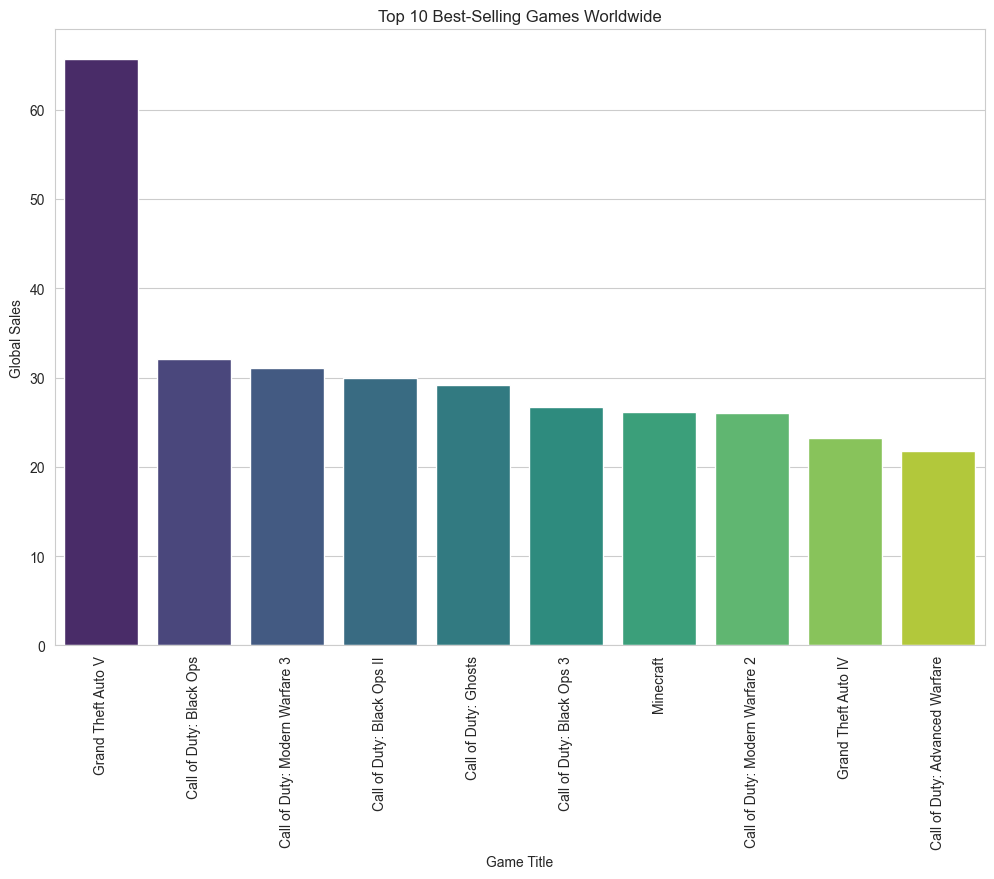

In [482]:
plt.figure(figsize = (12,8))
sns.barplot(data = top10_titles, x = 'title', y = 'total_sales', palette='viridis')
plt.title("Top 10 Best-Selling Games Worldwide")
plt.xlabel("Game Title")
plt.ylabel("Global Sales")
plt.xticks(rotation = 90)
plt.show()

GRAND THEFT AUTO V IS THE HIGHEST SELLING TITLE WORLDWIDE

2. Examine sales trends over time to capture industry growth or decline.

In [390]:
# EXTRACTING RELEASE YEAR FOR GROUPBY FUNCTION

df['release_year'] = pd.to_datetime(df['release_date']).dt.year

df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-05-06,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-03-01,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-05-06,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-05-06,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-06-11,2018-01-14,2015


In [391]:
df.loc[df.release_year > 2024]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
30650,The Oregon Trail,Series,Education,MECC,MECC,7.22044,0.349113,0.26474,0.102281,0.149472,0.043041,2071-03-12,2020-02-18,2071
57351,Trek73,PC,Simulation,Unknown,"William K. Char, Perry Lee, and Dan Gee",7.22044,0.349113,0.26474,0.102281,0.149472,0.043041,2073-08-10,2019-05-06,2073


In [392]:
df = df.drop(df[df['release_year'] == 2071].index)
df = df.drop(df[df['release_year'] == 2073].index)

In [393]:
yearly_sales = df.groupby(['release_year']).total_sales.sum().sort_values(ascending = False).reset_index()

top10_years = yearly_sales.head(10)

top10_years

,release_year,total_sales
0,2008,3429.537130
1,2009,1405.496739
2,2010,1223.813444
3,2011,1185.326444
4,2014,1083.199317
5,2007,875.224630
6,2013,694.012137
7,2002,620.322702
8,2003,616.138744
9,2006,610.290081


C:\Users\asus\AppData\Local\Temp\ipykernel_22864\1138402198.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




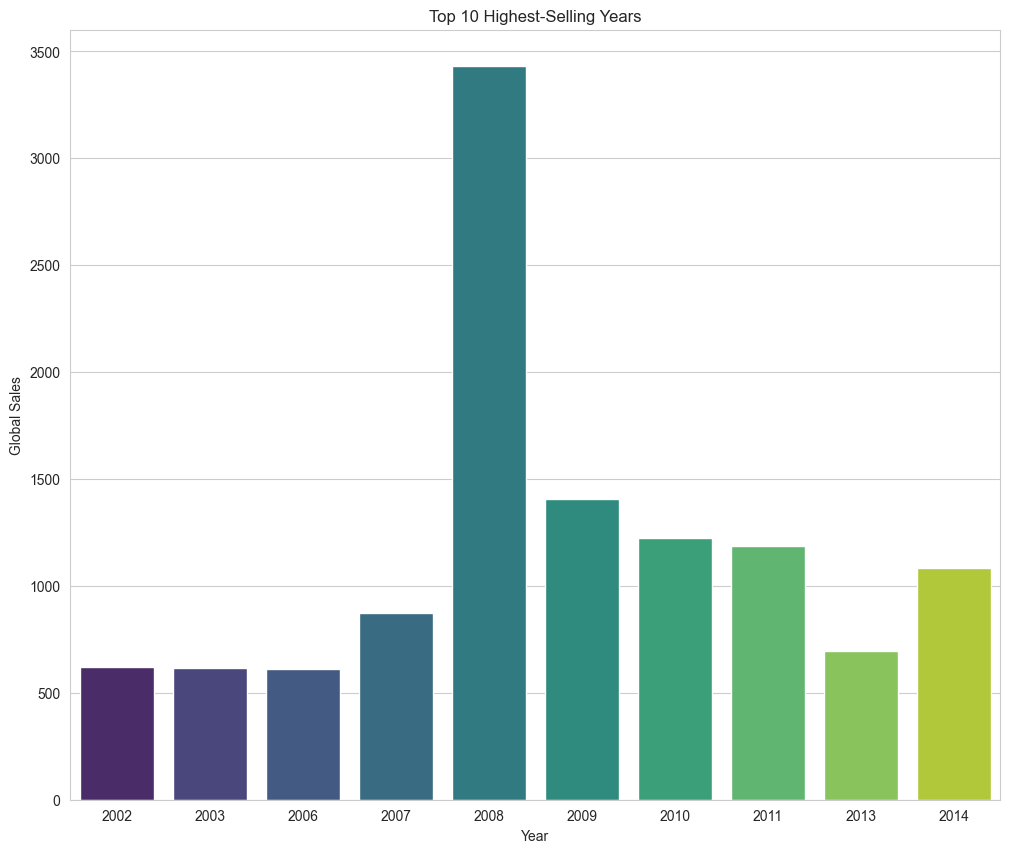

In [475]:
plt.figure(figsize = (12,10))
sns.barplot (data = top10_years, x = 'release_year', y = 'total_sales', palette = 'viridis')
plt.title("Top 10 Highest-Selling Years")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.xticks(rotation=0)
plt.show()

2008 WAS THE HIGHEST SELLING YEAR FOR GAMES, FOLLOWED BY 2009.

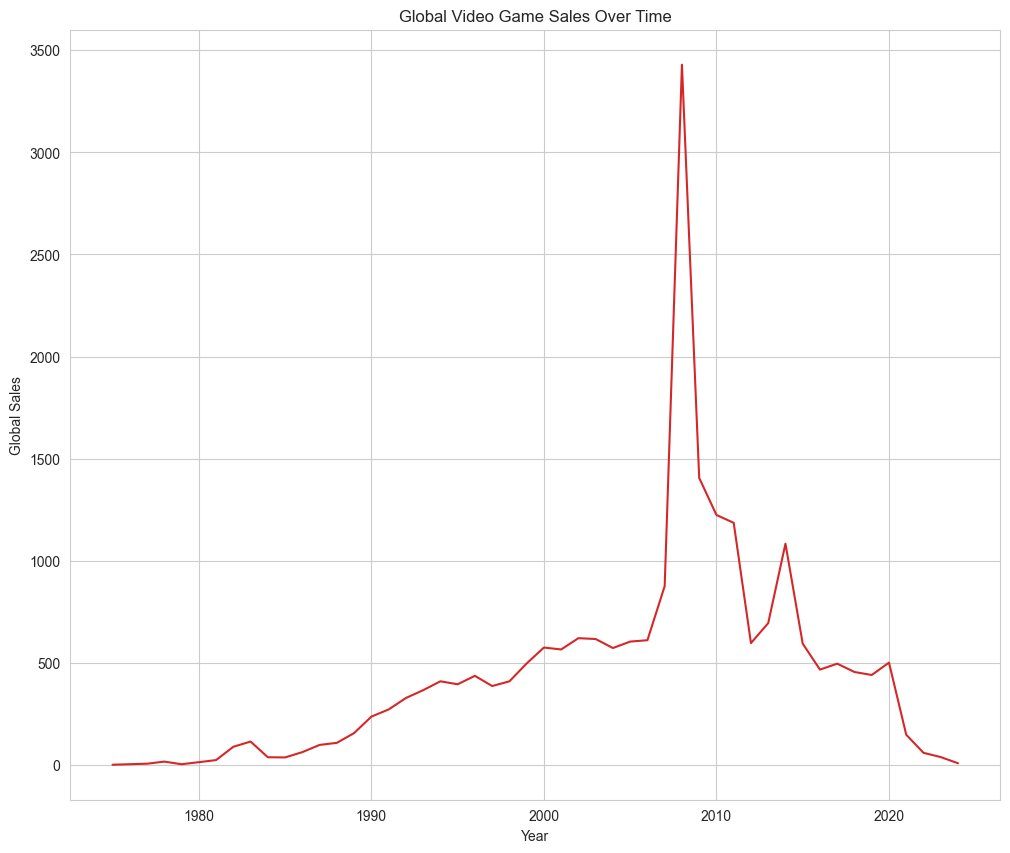

In [476]:
# INDUSTRY TREND GROWTH OR DECLINE

plt.figure(figsize=(12,10))
sns.lineplot(data = yearly_sales, x='release_year', y='total_sales', marker='', color='tab:red')
plt.title("Global Video Game Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.grid(True)
plt.show()

THE INDUSTRY HAS SHOWN MASSIVE GROWTH SPIKE IN 2008, FOLLOWED BY A GRADUAL DECLINE.

3. Discover genre specializations across consoles.

In [396]:
console_genre = df.groupby(['console', 'genre']).total_sales.sum().reset_index()

cg_sorted = console_genre.sort_values(by = 'total_sales', ascending = False).head(50).reset_index()

cg_sorted.head()

,index,console,genre,total_sales
0,456,PC,Adventure,579.434784
1,472,PC,Strategy,491.942109
2,461,PC,Misc,466.622278
3,467,PC,Role-Playing,421.048926
4,454,PC,Action,406.433771


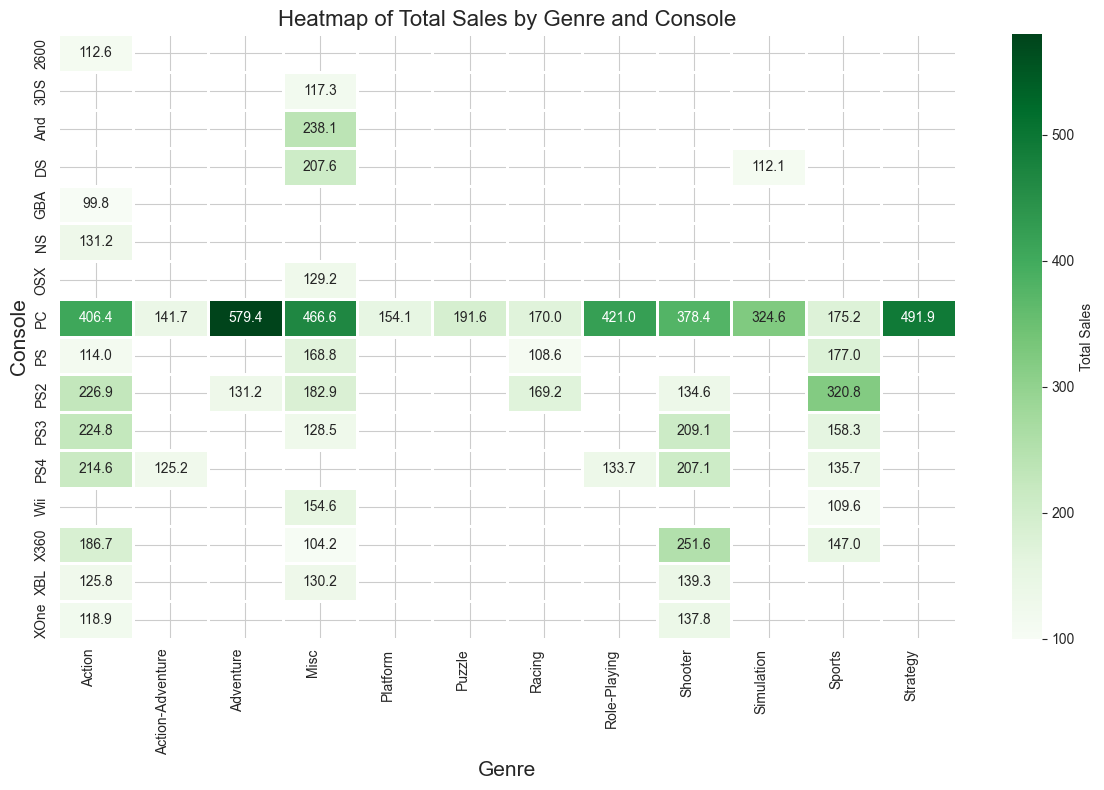

In [481]:
# Pivot the data for a heatmap (this will create a matrix of platforms and genres)
heatmap_data = cg_sorted.pivot(index='console', columns='genre', values='total_sales')

# Create a heatmap using Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Greens', linewidths=1, cbar_kws={'label': 'Total Sales'})

plt.title("Heatmap of Total Sales by Genre and Console", fontsize=16)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Console", fontsize=15)
plt.xticks(rotation=90, ha='right')  

plt.tight_layout()
plt.show()

PC CONSOLE HAS THE HIGHEST SALES WITH ADVENTURE BEING THE MAIN SPECIALIZATION, FOLLOWED BY STRATEGY, ROLE-PLAYING, AND ACTION.

GENRES LIKE ACTION, SHOOTER AND SPORTS HAVE A WIDESPREAD REACH TO MULTIPLE CONSOLES. REST OF THE GENRES ARE CONSOLE SPECIFIC.

4. Analyze regional popularity to spot localized preferences or disparities.

In [362]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-05-06,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-03-01,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-05-06,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-05-06,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-06-11,2018-01-14,2015


In [398]:
df['na_ratio'] = df['na_sales'] / df['total_sales']
df['jp_ratio'] = df['jp_sales'] / df['total_sales']
df['pal_ratio'] = df['pal_sales'] / df['total_sales']

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
18669,Europa Universalis: Rome Gold,PC,Strategy,Paradox Interactive,Paradox Interactive,7.22044,0.0,0.26474,0.102281,0.000000,0.000000,2009-10-07,2019-05-06,2009,inf,inf,NaN
18051,Island,PS4,Adventure,Prototype,Prototype,7.22044,0.0,0.26474,0.000000,0.149472,0.043041,2018-06-28,2018-12-08,2018,inf,NaN,inf
18032,Ninki Seiyuu no Tsukurikata,PSV,Adventure,Entergram,Entergram,7.22044,0.0,0.26474,0.000000,0.149472,0.043041,2018-01-25,2018-03-24,2018,inf,NaN,inf
18033,Hidden Expedition: The Uncharted Islands,PC,Adventure,Unknown,Activision,7.22044,0.0,0.26474,0.102281,0.000000,0.000000,2008-08-27,2019-05-06,2008,inf,inf,NaN
18034,The Lost Crown: A Ghost-hunting Adventure,PC,Adventure,Got Game Entertainment,Darkling Room,7.22044,0.0,0.26474,0.102281,0.000000,0.000000,2008-03-03,2019-05-06,2008,inf,inf,NaN


: > 80 %  OF TOTAL SALES IN A REGION IS CONSIDERED A HIT AND < 20 % IS A FLOP

In [421]:
# HIT IN NA - FLOP IN JP AND PAL

na_hit = df[(df.na_ratio > 0.8) & (df.jp_ratio < 0.2) & (df.pal_ratio < 0.2)].sort_values(by = 'na_sales', ascending = False)
na_top10 = na_hit.head(10)
na_top10

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
75,Madden NFL 2004,PS2,Sports,EA Sports,EA Tiburon,9.50000,5.23,4.26,0.010000,0.26,0.71,2003-12-08,2019-05-06,2003,0.814532,0.001912,0.049713
114,Madden NFL 2005,PS2,Sports,EA Sports,EA Tiburon,9.50000,4.53,4.18,0.010000,0.26,0.08,2004-09-08,2019-05-06,2004,0.922737,0.002208,0.057395
125,Asteroids,2600,Shooter,Atari,Atari,7.22044,4.31,4.00,0.102281,0.26,0.05,1981-01-01,2019-05-06,1981,0.928074,0.023731,0.060325
94,Madden NFL 06,PS2,Sports,EA Sports,EA Tiburon,9.10000,4.91,3.98,0.010000,0.26,0.66,2005-08-08,2019-05-06,2005,0.810591,0.002037,0.052953
136,Frogger,PS,Action,Hasbro Interactive,Millenium Interactive,7.22044,4.16,3.79,0.102281,0.27,0.11,1997-09-30,2019-05-06,1997,0.911058,0.024587,0.064904
135,Teenage Mutant Ninja Turtles,NES,Platform,Ultra Games,Konami,5.90000,4.17,3.38,0.310000,0.44,0.04,1989-01-06,2019-05-06,1989,0.810552,0.074341,0.105516
139,Madden NFL 2003,PS2,Sports,EA Sports,EA Tiburon,9.40000,4.14,3.36,0.010000,0.21,0.56,2002-12-08,2019-05-06,2002,0.811594,0.002415,0.050725
193,Assassin's Creed: Brotherhood,X360,Action,Ubisoft,Ubisoft Montreal,9.10000,3.53,2.87,0.030000,0.39,0.25,2010-11-16,2019-05-06,2010,0.813031,0.008499,0.110482
247,NBA 2K13,X360,Sports,2K Sports,Visual Concepts,8.60000,3.11,2.62,0.010000,0.21,0.28,2012-02-10,2018-04-01,2012,0.842444,0.003215,0.067524
270,Madden NFL 13,X360,Sports,EA Sports,EA Tiburon,8.00000,2.93,2.53,0.102281,0.16,0.24,2012-08-28,2018-04-01,2012,0.863481,0.034908,0.054608


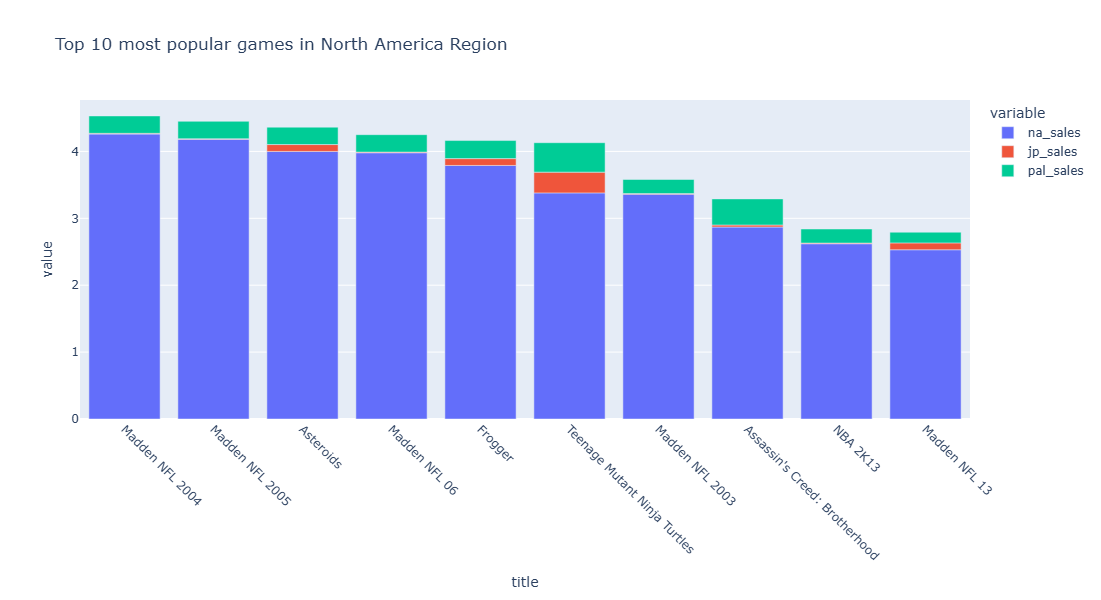

In [457]:
fig =  px.bar(na_top10, x = 'title', y = ['na_sales', 'jp_sales', 'pal_sales'], title = 'Top 10 most popular games in North America Region')
fig.update_layout(
    width = 1000,  
    height = 600,
    xaxis_tickangle = 45
)
fig.show()

GAMES THAT WERE A HIT IN NA BUT FLOPPED IN JP AND PAL - MADDEN NFL 2004 WITH HIGHEST SALES IN NA

In [429]:
# HIT IN JP - FLOP IN NA AND PAL

jp_hit = df[(df.jp_ratio > 0.8) & (df.na_ratio < 0.2) & (df.pal_ratio < 0.2)].sort_values(by = 'jp_sales', ascending = False)
jp_top10 = jp_hit.head(10)
jp_top10

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
349,Hot Shots Golf,PS,Sports,Sony Computer Entertainment,Camelot Software Planning,7.22044,2.56,0.26000,2.13,0.170000,0.043041,1998-05-05,2019-05-06,1998,0.101562,0.832031,0.066406
445,R.B.I. Baseball,NES,Sports,Tengen,Namco,7.22044,2.20,0.15000,2.05,0.149472,0.043041,1988-01-01,2019-05-06,1988,0.068182,0.931818,0.067942
499,Famista '89 - Kaimaku Han!!,NES,Sports,Namco,Namco,7.22044,2.05,0.26474,2.05,0.149472,0.043041,1989-07-28,2019-05-06,1989,0.129141,1.000000,0.072913
604,Dragon Quest XI,3DS,Role-Playing,Square Enix,Square Enix,7.22044,1.82,0.26474,1.82,0.149472,0.043041,2017-07-29,2018-05-01,2017,0.145462,1.000000,0.082128
667,Super Puyo Puyo,SNES,Puzzle,Banpresto,Compile,7.22044,1.70,0.26474,1.69,0.149472,0.010000,1993-10-12,2019-05-06,1993,0.155729,0.994118,0.087925
675,Tomodachi Collection: New Life,3DS,Simulation,Nintendo,Nintendo,7.22044,1.69,0.26474,1.69,0.149472,0.043041,2013-04-13,2018-06-01,2013,0.156651,1.000000,0.088445
815,Ninja Hattori Kun: Ninja wa Shuugyou Degogiru ...,NES,Platform,Hudson Soft,Hudson Soft,7.22044,1.50,0.26474,1.50,0.149472,0.000000,1986-05-03,2019-05-06,1986,0.176493,1.000000,0.099648
873,Dragon Ball Z,SNES,Fighting,Bandai,TOSE,7.22044,1.45,0.26474,1.45,0.149472,0.000000,1999-01-01,2019-05-06,1999,0.182579,1.000000,0.103084
872,Tamagotchi,GB,Simulation,Bandai,Tom Create,7.22044,1.45,0.26474,1.44,0.149472,0.010000,1997-06-26,2019-05-06,1997,0.182579,0.993103,0.103084
869,Game de Hakken!! Tamagotchi 2,GB,Simulation,Bandai,Tom Create,7.22044,1.45,0.26474,1.44,0.149472,0.010000,1997-10-17,2019-05-06,1997,0.182579,0.993103,0.103084


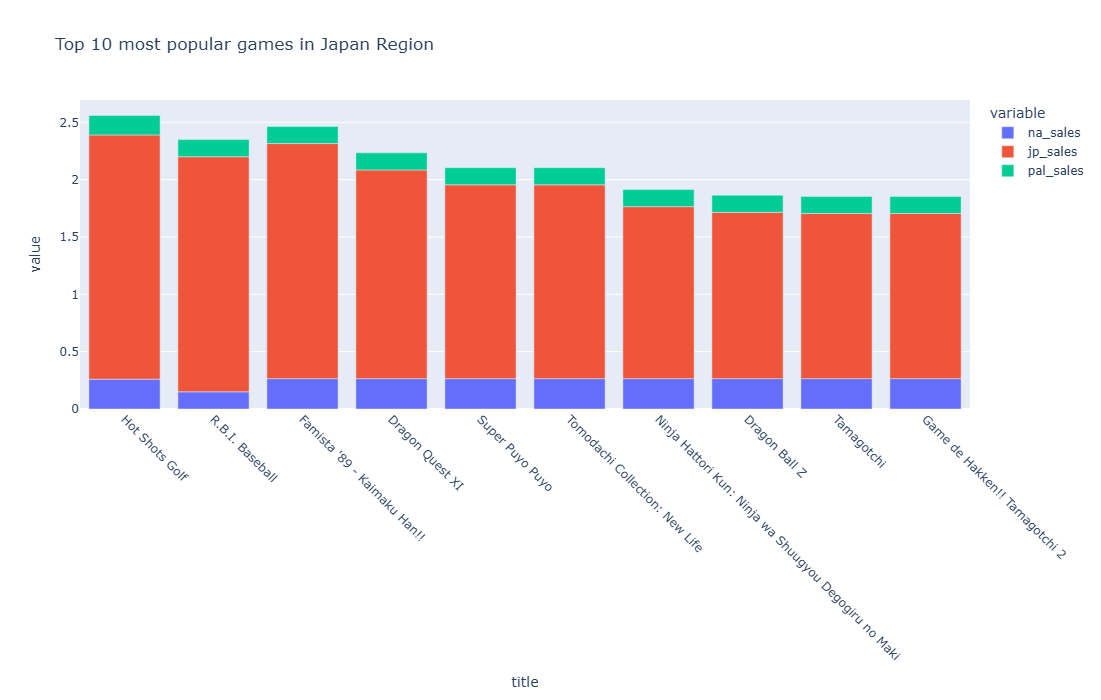

In [460]:
fig = px.bar(jp_top10, x = 'title', y = ['na_sales', 'jp_sales', 'pal_sales'], title = 'Top 10 most popular games in Japan Region')
fig.update_layout(
    width = 1000,  
    height = 700,
    xaxis_tickangle = 45
)
fig.show()

GAMES THAT WERE A HIT IN JP BUT FLOPPED IN NA AND PAL - HOT SHOTS GOLF WITH HIGHEST SALES IN JP

In [459]:
# HIT IN PAL - FLOP IN NA AND JP

pal_hit = df[(df.pal_ratio > 0.8) & (df.na_ratio < 0.2) & (df.jp_ratio < 0.2)].sort_values(by = 'pal_sales', ascending = False)
pal_top10 = pal_hit.head(10)
pal_top10

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
34,The Sims 3,PC,Simulation,Electronic Arts,EA Redwood Shores,8.50000,7.96,1.01000,0.102281,6.46,0.500000,2009-02-06,2019-05-06,2009,0.126884,0.012849,0.811558
280,Colin McRae Rally,PS,Racing,Sony Computer Entertainment,Codemasters,7.90000,2.87,0.09000,0.120000,2.43,0.220000,2000-01-31,2019-05-06,2000,0.031359,0.041812,0.846690
1007,TOCA 2 Touring Car Championship,PS,Racing,Codemasters,Codemasters,7.22044,1.32,0.03000,0.020000,1.16,0.110000,1999-10-31,2019-05-06,1999,0.022727,0.015152,0.878788
918,Anno 2070,PC,Strategy,Ubisoft,Blue Byte Studio,8.70000,1.40,0.26474,0.102281,1.14,0.260000,2011-11-17,2019-05-06,2011,0.189100,0.073058,0.814286
1077,Brian Lara Cricket,PS,Sports,Codemasters,Codemasters,7.22044,1.26,0.02000,0.010000,1.13,0.100000,1998-01-12,2019-05-06,1998,0.015873,0.007937,0.896825
1213,Spore,PC,Strategy,Electronic Arts,Maxis,7.00000,1.16,0.03000,0.102281,1.06,0.070000,2008-07-09,2019-05-06,2008,0.025862,0.088173,0.913793
1543,Grand Theft Auto: San Andreas,PC,Action,Rockstar Games,Rockstar North,9.40000,0.97,0.00000,0.102281,0.93,0.040000,2005-07-06,2019-05-06,2005,0.000000,0.105444,0.958763
1347,Pro Evolution Soccer 2008,X360,Sports,Konami,Konami,7.22044,1.07,0.08000,0.040000,0.90,0.050000,2008-12-03,2019-05-06,2008,0.074766,0.037383,0.841121
1483,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,Sports,Konami,Konami Computer Entertainment Tokyo,7.22044,1.00,0.08000,0.020000,0.90,0.043041,2007-06-02,2019-05-06,2007,0.080000,0.020000,0.900000
1530,Fallout 3,PC,Role-Playing,Bethesda Softworks,Bethesda Game Studios,9.00000,0.98,0.02000,0.102281,0.88,0.070000,2008-10-28,2019-05-06,2008,0.020408,0.104368,0.897959


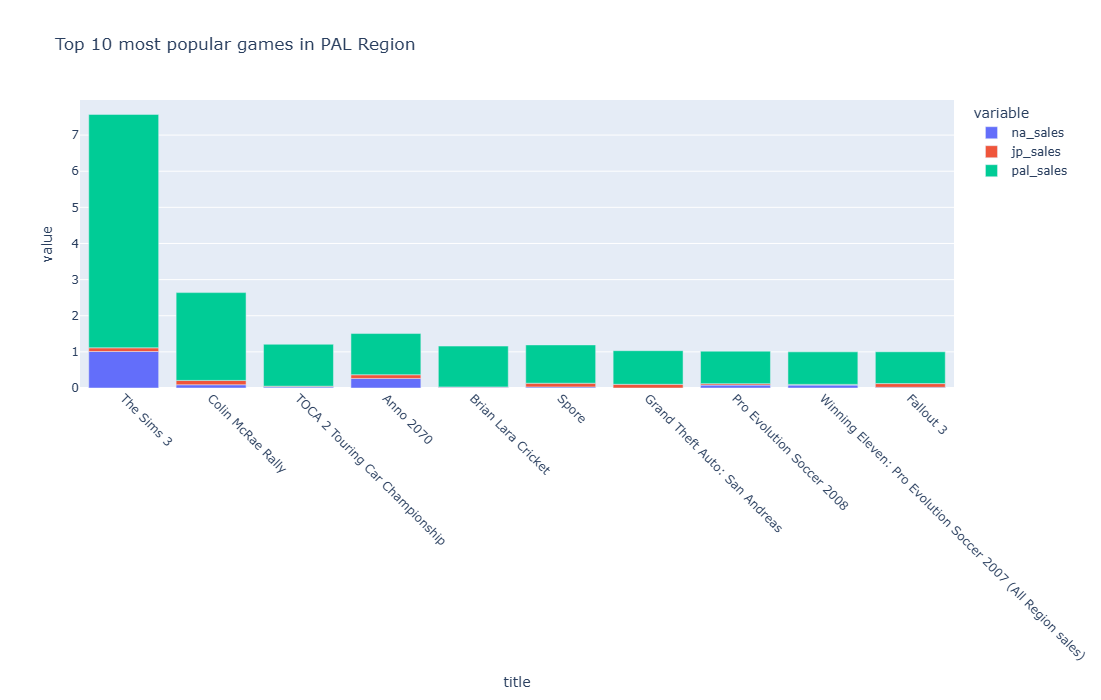

In [463]:
fig = px.bar(pal_top10, x = 'title', y = ['na_sales', 'jp_sales', 'pal_sales'], title = 'Top 10 most popular games in PAL Region')
fig.update_layout(
    width = 1000,  
    height = 700,
    xaxis_tickangle = 45
)
fig.show()

GAMES THAT WERE A HIT IN PAL BUT FLOPPED IN NA AND JP - THE SIMS 3 WITH HIGHEST SALES IN PAL

**THE END**